# Application de l'algorithme knn dans le diagnostic du cancer du sein

**Avant de commencer la lecture :**  Ce Notebook a pour objectif d'**illustrer une application réelle et actuelle des méthodes algorithmiques**. Même s'il y a quelques courtes questions à faire, il s'agit surtout de prendre conscience de la démarche utilisée dans le traitement des données pour arriver à la **meilleure prédiction**, c'est-à-dire au meilleur **diagnostic possible**
      
Dans ce notebook, pour faciliter la lecture, un certain nombre de fonctions ont été codées dans un fichier externe d'où la nécessité d'importer le module `kNN_sur_breast` en exécutant la cellule de code ci-dessous. Par ailleurs cela rendra importera le jeu de données dans `table_mesures`.

In [1]:
from kNN_sur_breast import*
table_mesures = obtenir_table_datas('dataOncologie/wdbc_normalisee.data') 

## Travail demandé
**Il est demandé de répondre aux questions en insérant des cellules "réponses" sous chaque question. Pour cela, il faut ouvrir le Notebook avec BINDER (voir lien dans le dépôt), y ajouter vos réponses, télécharger ce nouveau notebook complété puis le déposer sur votre espace personnel dans github**

# Etude de données :  Prédiction de la gravité d'une tumeur du sein </h1>

Le jeu de données utilisé a été obtenu dans le cadre d'une étude menée en collaboration avec l'université du Wisconsin. L'étude a trouvé une méthode pour prédire le caractère bénin ou malin d'un cancer du sein au vu de la forme des noyaux des cellules cancéreuses.  
Dans toute la suite "faire un diagnostic" signifiera "prédire la caractère bénin ou malin d'un cancer du sein".

## Présentation du jeu de données et mise à disposition dans une table

Voici un exemple d'**enregistrement** qui correspond aux données d'une seule patiente parmi les 569 patientes présentes dans le fichier : 

```
{'rayonM': 1.029,
 'textureM': 0.725,
 'perimetreM': 1.021,
 'aireM': 0.984,
 'regulariteM': 1.141,
 'compaciteM': 0.886,
 'concaviteM': 0.776,
 'nb_concaveM': 1.328,
 'symetrieM': 0.911,
 'fractaleM': 0.975,
 'rayonES': 0.755,
 'textureES': 0.593,
 'perimetreES': 0.748,
 'aireES': 0.637,
 'regulariteES': 0.871,
 'compaciteES': 0.491,
 'concaviteES': 0.506,
 'nb_concaveES': 0.963,
 'symetrieES': 1.074,
 'fractaleES': 0.939,
 'rayonP': 0.971,
 'textureP': 0.659,
 'perimetreP': 0.961,
 'aireP': 0.852,
 'regulariteP': 1.018,
 'compaciteP': 0.581,
 'concaviteP': 0.504,
 'nb_concaveP': 0.933,
 'symetrieP': 0.898,
 'fractaleP': 0.93,
 'ID': 911201,
 'Etiquette': 'B'}
```

### Description des différents champs

Le jeu de données comporte 569 enregistrements. Pour chacun des enregistrements, on dispose :
- de deux champs concernant l'identifiant de la patiente et la gravité de sa tumeur :
    - `ID` : identifiant de la patiente, 
    - `Etiquette` : gravité de la tumeur (M = Maligne, B = Bénigne).
 
 
- de trente champs concernant des mesures effectuées sur les noyaux de cellules tumorales (chaque mesure ayant été effectuée plusieurs fois sur le noyau de la cellule, les suffixes `M`, `P` ou `ES` permettent de distinguer la valeur moyenne de la mesure, la pire valeur de la mesure et l'erreur standard sur les différentes mesures):
    - `rayonM`, `rayonP`, `rayonES` : rayon, 
    - `textureM`, `textureP`, `textureES` : indice mesurant la texture, 
    - `perimetreM`, `perimetreP`, `perimetreES` : perimètre, 
    - `aireM`, `aireP`, `aireES` : surface, 
    - `regulariteM`, `regulariteP`, `regulariteES` : indice mesurant les variations de la distance centre --> périphérie, 
    - `compaciteM`, `compaciteP`, `compaciteES` : indice mesurant la compacité $(\frac{(perimetre)^2}{area} - 1)$. 
    - `concaviteM`, `concaviteP`, `concaviteES` : indice mesurant la concavité (le fait de présenter des creux), 
    - `nb_concaveM`, `nb_concaveP`, `nb_concaveES` : nombre de points de concavité, 
    - `symetrieM`, `symetrieP`, `symetrieES` : indice mesurant le caractère symétrique, 
    - `fractaleM`, `fractaleP`, `fractaleES` : indice mesurant la dimension fractale.


### Spécificité du champ `Etiquette`
Le champ concernant la gravité de la tumeur est spécial dans ce jeu de données et est appelé `Etiquette` car c'est lui que l'on cherchera à prédire.  

Dans le vaste domaine de l'étude des données, lorsqu'on fait de la prédiction de classe, le terme `Etiquette` est traditionnellement utilisé (ici on a deux étiquettes : `M` et `B`) pour désigner les classes dans lesquelles on cherche  à "ranger" un individu.   

En termes médicaux, si on reformule cela, pour une future patiente un médecin cherchera à établir un diagnostic de la gravité de sa tumeur (`M` ou `B`) au vu des valeurs des 30 mesures effectuées sur les noyaux des cellules.

> On cherche, en  exploitant ce jeu de données de 569 femmes, à trouver une méthode permettant d'effectuer un diagnostic (**Maligne** ou **Bénigne**) sur une **nouvelle** patiente qui n'est PAS dans le fichier des 569 enregistrements. La méthode générale est la suivante :   
- on effectue un prélèvement médical sur cette nouvelle patiente,
- sur les noyaux des cellules cancéreuses de la nouvelle patiente, on effectue les 30 mesures associées aux 30 champs ci-dessus, 
- à partir de ces 30 valeurs on cherche à prédire la valeur de l'`Etiquette`, c'est à dire déterminer si la tumeur est **Maligne** ou **Bénigne**,
- on souhaite aussi connaître les taux d'erreur du diagnostic effectué (tableau de contingence).

**Question 1**
    
Comment "traduire" le terme médical "faire un diagnostic de la gravité d'une tumeur d'une patiente" en "langage data sciences". Pour cela écrire une ou quelques phrases contenant les termes **étiquette**, **enregistrement**, **descripteurs** et **base de données**, **algorithme knn**, **prédire**  

**Question 2**  
    
- Combien y a-t-il d'enregistrements dans le jeu de données utilisées ?
    
- Pour chaque enregistrement, combien y a-t-il de champs différents ?  
    
- Parmi ces champs, quels sont les deux champs qui ont un rôle spécial par rapport à tous les autres ? 
    
- Quel est le champ que l'on cherchera à prédire sur les nouvelles patientes lorsqu'on fera des diagnostics ?
    


### Importation en Python


Le jeu de données utilisé est situé dans une table qui comporte 569 enregistrements :

In [2]:
len( table_mesures )

569

On peut désormais accéder aux **30 mesures** obtenues sur les 569 patientes et aux **étiquettes** **Maligne** ou **Bénigne** de leurs tumeurs. Ainsi pour accéder à l'enregistrement de la 444 ème patiente, enregistrement qui contient  l'**ensemble de ses mesures** et son **étiquette**, il suffit d'exécuter l'instruction suivante :


In [3]:
# On rappelle que le premier enregistrement est d'indice nul
table_mesures[453]

{'rayonM': 1.029,
 'textureM': 0.725,
 'perimetreM': 1.021,
 'aireM': 0.984,
 'regulariteM': 1.141,
 'compaciteM': 0.886,
 'concaviteM': 0.776,
 'nb_concaveM': 1.328,
 'symetrieM': 0.911,
 'fractaleM': 0.975,
 'rayonES': 0.755,
 'textureES': 0.593,
 'perimetreES': 0.748,
 'aireES': 0.637,
 'regulariteES': 0.871,
 'compaciteES': 0.491,
 'concaviteES': 0.506,
 'nb_concaveES': 0.963,
 'symetrieES': 1.074,
 'fractaleES': 0.939,
 'rayonP': 0.971,
 'textureP': 0.659,
 'perimetreP': 0.961,
 'aireP': 0.852,
 'regulariteP': 1.018,
 'compaciteP': 0.581,
 'concaviteP': 0.504,
 'nb_concaveP': 0.933,
 'symetrieP': 0.898,
 'fractaleP': 0.93,
 'ID': 911201,
 'Etiquette': 'B'}

Et pour obtenir une **mesure précise** - donnée par son descripteur - concernant la 310ème patiente de l'étude :

In [2]:
# Les descripteurs sont les clés des dictionnaires
table_mesures[309]['rayonM']

0.924

In [5]:
table_mesures[309]['rayonP']

0.905

In [6]:
table_mesures[309]['concaviteM']

0.051

On peut aussi savoir si cette patiente avait souffert d'un cas **B**énin ou **M**alin en demandant son étiquette :

In [8]:
table_mesures[309]['Etiquette']

'B'

> On voit donc que l'instruction `table_mesures[numero_patiente][descripteur]` permet d'accéder, pour la patiente `numero_patiente`, à la valeur du descripteur indiqué. On a donc accès à toutes les données du fichier dans python.


**Question 3**

Ecrire les instructions python permettant d'accéder :
- aux valeurs des **champs** `symetrieM`, `aireP`, `rayonES` de la 333eme patiente de la liste.

- à son étiquette et son identifiant

# Etudier les données pour savoir lesquelles sont pertinentes

* Dans un jeu de données, il peut y avoir des champs qui n'ont aucune utilité pour effectuer la prédiction de l'étiquette que l'on cherche à réaliser. Pour plusieurs raisons, les valeurs des champs inutiles ne doivent **de préférence pas être prises en compte**. Sans rentrer dans les détails, prendre en compte des données non pertinentes ne peut qu'altérer la qualité de la prédiction effectuée.


* Lors de la mise en oeuvre d'une méthode de prédiction basée sur des données en quantité, il faut donc effectuer une **étude en amont** pour trouver les champs **pertinents à prendre en compte** et ceux qui peuvent ou doivent être écartés. Il faut également bien souvent, pour réduire le plus possible les taux d'erreur de prédiction, **déterminer des coefficients** à appliquer à tel ou tel champ dans la calcul de la distance de l'algorithme knn. Ainsi pour les caractéristiques de la tumeur les plus pertinentes d'un point de vue médical, leurs champs associés devront être **surpondérés** par rapport aux autres champs dans le calcul de la distance.

**Question 4**

Combien a-t-on de champs à disposition dans la base de donnée initiale pour effectuer une prédiction de l'étiquette. Pourquoi ne doit-on pas garder tous ces 30 champs pour faire un diagnostic ?

Voyons maintenant quelques graphiques qui vont nous faire comprendre visuellement comment on peut voir que certains champs sont "utiles" et que d'autres champs sont "inutiles".

## Pertinence / Non-pertinence d'un seul champ du jeu de données 

La fonction `afficher_mesures_descripteur` permet de visualiser un graphique obtenu en traçant le nuage de points pour lequel :
- **un point correspond à une patiente**
- **l'abscisse du point est la mesure obtenue pour le descripteur,**
- **LA COULEUR DU POINT EST LE CARACTERE MALIN (ROUGE) OU BENIN (VERT) DE LA TUMEUR.**

### aireP, concaviteP et compaciteM : nuages rouge et verts séparés --> bons prédicteurs uniques

En utilisant cet affichage, on peut trouver des descripteurs pour lesquels les points rouges et verts sont nettement séparés : ces descripteurs permettent donc de faire un diagnostic. De tels descripteurs sont par exemple `aireP`, `compaciteM` et `concaviteP`.

Si on dispose de la valeur de ce descripteur sur une nouvelle patiente, en plaçant la valeur sur le graphique, selon la zone rouge ou verte on sera capable de faire un diagnostic.   

Par exemple si on a une patiente avec aireP = 0,4 on voit que c'est en zone verte donc on peut se dire que c'est sans doute un cas bénin et faire la diagnostic : 'Etiquette = 'B'.  
A contrario, si on a une patiente avec compaciteM = 2,5 on voit que c'est en zone rouge donc on peut se dire que c'est sans doute un cas malin et faire la diagnostic : 'Etiquette = 'M'.  

On dit que ce sont de **bons prédicteurs uniques** car ils vont permettre de faire de bonnes prévisions.

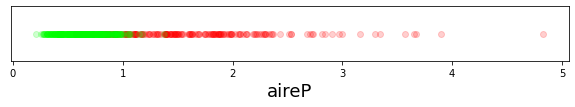

In [3]:
afficher_mesures_descripteur('aireP', table_mesures)

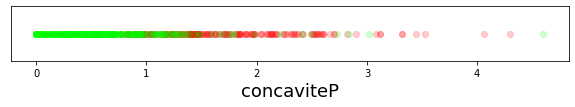

In [8]:
afficher_mesures_descripteur('concaviteP', table_mesures)

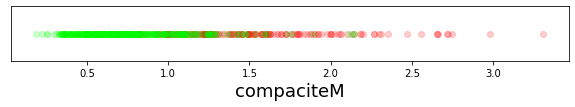

In [9]:
afficher_mesures_descripteur('compaciteM', table_mesures)

### fractaleM, regulariteM, symetrieM : nuages rouge et vert superposés --> mauvais prédicteurs uniques

On peut aussi trouver des descripteurs pour lesquels les points rouges et verts ne sont pas séparés et sont tous les uns sur les autres (sur les chémas ci-dessous, les points rouges sont dessinés SOUS les points verts).  De tels descripteurs sont par exemple `fractaleM`, `regulariteM` et `symetrieM`.  

Si par exemple on a une patiente avec fractaleM = 1,1 on sera incapable de savoir si on est dans un cas bénin ou malin puisque les points verts et rouges sont superposés ...

On dit que ce sont de **mauvais prédicteurs uniques** car ils ne vont pas permettre de faire de bonnes prévisions.

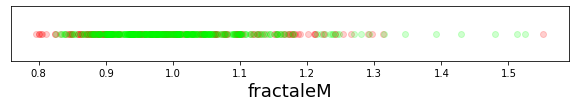

In [10]:
afficher_mesures_descripteur('fractaleM', table_mesures)

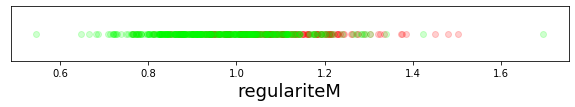

In [11]:
afficher_mesures_descripteur('regulariteM', table_mesures)

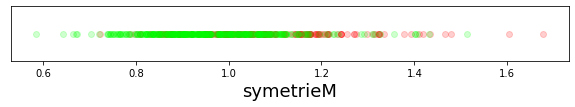

In [12]:
afficher_mesures_descripteur('symetrieM', table_mesures)

### à vous de deviner ...

**Question 5**  

En observant les graphiques ci-dessus :
    
- Une patiente a une valeur du champ `concaviteP` égale à 0,8.  Quel diagnostic feriez vous ?
    
- Une autre patiente avec une valeur du champ `fractaleM` égale à 1. Quel diagnostic feriez vous ?

**Question 6**  

En observant les graphiques ci-dessous :  
    
- Le champ `nb_concaveES` est-il un bon ou un mauvais prédicteur unique pour faire un diagnostic ?  
- Le champ `rayonP` est-il un bon ou un mauvais prédicteur unique pour faire un diagnostic ?  

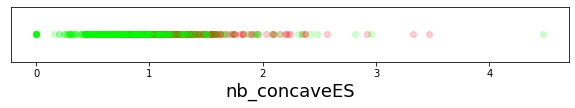

In [14]:
afficher_mesures_descripteur('nb_concaveES', table_mesures)

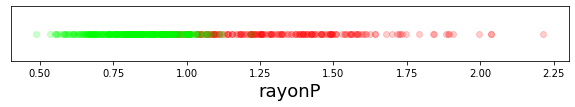

In [15]:
afficher_mesures_descripteur('rayonP', table_mesures)

**Question 7**

En utilisant les graphiques ci-dessus, expliquer pourquoi utiliser un **seul bon** prédicteur unique n'est quand même pas une bonne idée. Pour cela, vous pouvez imaginer le cas d'une patiente et donner les valeurs de certains champs.

## Représentation de deux ou trois champs du jeu de données en 2D ou en 3D 

### Pourquoi se contenter d'un seul descripteur pris isolément est une mauvaise idée ? 

**Car un descripteur unique peut être mauvais tout seul alors que couplé avec un autre descripteur il peut être performant**.  

Cette idée est fondamentale en statistiques. Une façon simple de la comprendre est l'exemple suivant issu de la physique.  
- On considère un objet homogène avec un descripteur "masse" et un descripteur "volume".   

- Vous devez deviner si l'objet **flotte (gros points rouges)** ou **coule (petits points bleus)** uniquement en voyant la valeur de la masse et/ou du volume.   

- Si vous ne regardez **que** la masse c'est un très mauvais prédicteur : des objets lourds (tronc d'arbre) peuvent flotter et des objets légers peuvent couler (gravillon) ou le contraire (brindille et rocher).  

- Si vous ne regardez **que** le volume c'est un très mauvais indicateur également (trouvez vos exemples).  

- Par contre si vous regardez les deux prédicteurs masse et volume **ensemble** c'est un excellent prédicteur. Lorsque le volume en litres est inférieur à la masse en kg, l'objet coule : en 2D on obtient deux nuages de points clairement séparés.  

| Prédicteur Masse **isolé** (mauvais) | Prédicteur Volume **isolé** (mauvais) | Prédicteurs regardés **ensemble** (très bon)|
|:--------------------------:|:---------------------------:|:--------------------------------:|
| ![masse](dataOncologie/masse2.png)  |  ![title](dataOncologie/volume2.png)  |    ![title](dataOncologie/masse_volume2.png)     |

**Question 8**  
    
- En utilisant le graphique de gauche : vous avez un objet de 7 kg. Pouvez vous prédire s'il flotte ou coule ?  
    

- En utilisant le graphique du milieu : vous avez un objet de 9 litres. Pouvez vous prédire s'il flotte ou coule ?   
    
    
- En utilisant le graphique de droite : vous avez un objet de 6 litres pour 3 kilos. Pouvez vous prédires 'il flotte ou coule ?

L'étude de la flotaison des données est un cas trivial car bien sûr on sait depuis **Archimède** que en calculant la **masse volumique** on est sûr de savoir si un objet flotte ou pas. Dans ce cas, on connaît la **loi** physique. Mais dans le cas du diagnostic des tumeurs la **loi** qui donne le caractère malin ou bénin en fonction des caractères de la tumeur nous est inconnu (car soit trop complexe ou soit impossible à découvrir). D'où l'intérêt des méthodes statistiques comme l'algorithme knn. En effet, avant même Archimède, les hommes auraient pu prédire si un objet flotte ou pas en faisant l'étude si dessus sans connaître même connaître la loi de la poussée d'Archimède.

**Revenons maintenant à notre problème de diagnostic médical et voyons ce que l'on obtient lorsqu'on regarde plusieurs prédicteurs à la fois.**


### Représentation 2D pour nos données médicales

La fonction `afficher_mesures_deux_descripteurs` permet de visualiser le graphique 2D obtenu en traçant le nuage de points pour lequel :
- un point correspond à une patiente
- l'abscisse du point est la mesure obtenue pour le descripteur 1,
- l'ordonnée du point est la mesure obtenue pour le descripteur 2,
- la couleur du point est le caractère malin ou bénin de la tumeur.

En utilisant ces affichages, ce qui a été constaté avec un seul descripteur se généralise aux paires de deux descripteurs. On constate que certaines paires de descripteurs permettent de mieux séparer les points verts (**B**énigne) et les points rouges (**M**aligne) que d'autres. On peut même trouver des paires de descripteurs qui, pris de façon individuelle n'étaient pas discriminants alors que pris en couple ils le deviennent.
    
Voici trois exemples du plus discriminant au moins discriminant. Il ne faut pas hésiter  à modifier les descripteurs choisis dans les cellules de code pour voir si cela améliore ou pas la discrimination.
   

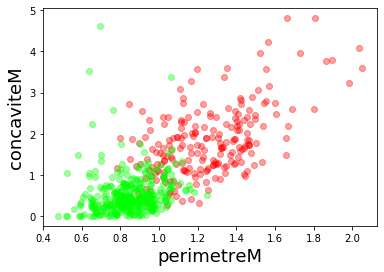

In [16]:
afficher_mesures_deux_descripteurs('perimetreM', 'concaviteM', table_mesures)

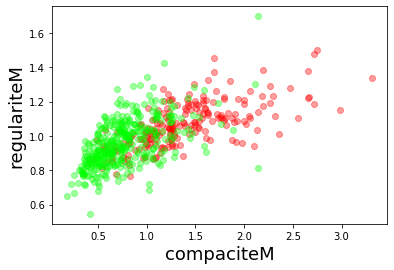

In [17]:
afficher_mesures_deux_descripteurs('compaciteM', 'regulariteM', table_mesures)

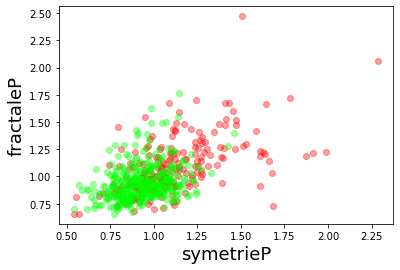

In [4]:
afficher_mesures_deux_descripteurs('symetrieP', 'fractaleP', table_mesures)

**Question 9**
    
Vous devez effectuer un diagnostic au vu de seulement deux descripteurs : soit `(perimetreM, concaviteM)`, soit `(compaciteM, regulariteM)` ou soit `(symetrieP, fractaleP)`.  

Quel couple de descripteurs choisissez vous ?

### Représentation 3D pour nos données médicales

On peut étendre ce qui précède en choisissant cette fois-ci trois descripteurs au lieu de se restreindre à deux.

L'éude menée par les chercheurs conclut que parmi les triplets de mesures, les trois mesures associées à `aireP`, `regulariteP` et `textureM` sont celles qui fonctionnent le mieux. On pourra utilement comparer les nuages de points obtenus avec ces trois mesures et les nuages de points obtenus avec, par exemple, les mesures `fractaleM`, `symetrieM` et `compaciteM` :

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


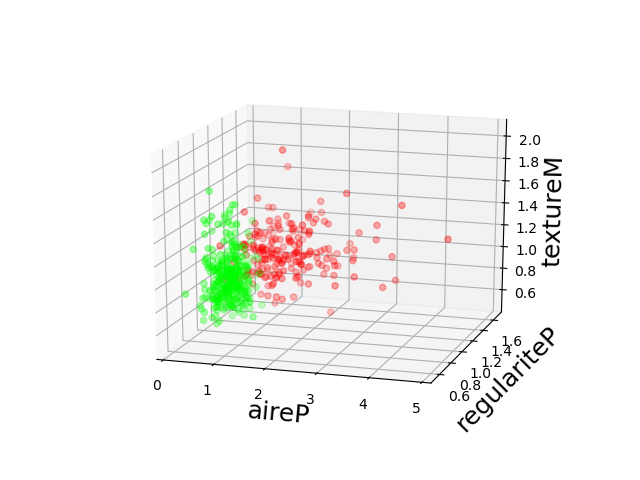

In [9]:
afficher_mesures_trois_descripteurs('aireP', 'regulariteP', 'textureM', table_mesures)

<IPython.core.display.Javascript object>


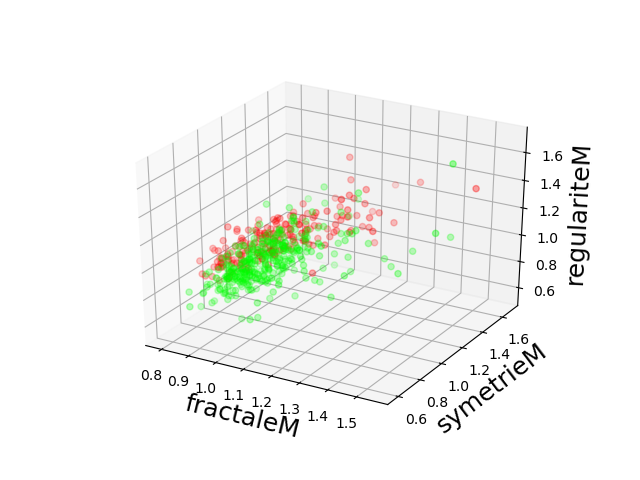

In [10]:
afficher_mesures_trois_descripteurs('fractaleM', 'symetrieM', 'regulariteM', table_mesures)

**Question 10**

- Parmi les deux triplets de descripteurs choisis ci-dessus : `(aireP, regulariteP, textureM)` et `(fractaleM, symetrieM, regulariteM)`, lequel choisiriez vous pour établir des diagnostics ?  
    
- Une patiente a `aireP = 1` ainsi que `regulariteP = 1.4` et `textureM = 1.4`.  Quel diagnostic faites vous ?

### Conclusion
**Avant d'implémenter une méthode - quelle qu'elle soit - une étude des données en amont est souvent nécessaire afin de pouvoir détecter comment discriminer au mieux les données.**

# Méthode de prédiction des moindres carrés

Compte-tenu du domaine médical auquel nous nous intéressons, il est important d'évaluer la qualité du diagnostic fourni. Cela permettra de choisir les descripteurs les plus efficaces pour effectuer la prédiction mais aussi de choisir la meilleure valeur de k possible (k est le nombre de voisins pris en compte dans la méthode algorithmique de diagnostic des k plus proches voisins).  


Nous allons ici utiliser la "leave-one-out cross-validation" :


**Pour chacune des 569 patientes** :
- mettre l'étiquette (`B` ou `M`) des données de la patiente à la poubelle,
- utiliser les données des 568 autres patientes comme données d'apprentissage,
- effectuer un diagnostic (`B` ou `M`) sur la patiente à partir :
    - des valeurs des mesures de la patiente,
    - des 568 données des autres patientes.
- comparer le diagnostic obtenu  avec l'étiquette mise à la poubelle.
- selon le résultat, incrémenter le compteur de vrai-positif ou de faux-positif ou de faux-négatif ou de vrai-négatif.

On est ainsi en mesure de tester 569 fois l'efficacité de la méthode de prédiction ce qui nous permettra d'obtenir ce qu'on appelle un tableau de contingence.

Par exemple le résultat affiché par la cellule ci-dessous nous indique qu'avec :
- les descripteurs `fractaleM`, `symetrieM`, `regulariteM`
- k = 5

On a eu :
- 281 patientes qui ont été diagnostiquées "Bénin" et dont l'étiquette mise à la poubelle était "Bénin" (vrai négatif)
- 84    patientes qui ont été diagnostiquées "Bénin" et dont l'étiquette mise à la poubelle était "Malin" (faux négatif)
- 76    patientes qui ont été diagnostiquées "Malin" et dont l'étiquette mise à la poubelle était "Bénin" (faux positif)
- 128  patientes qui ont été diagnostiquées "Malin" et dont l'étiquette mise à la poubelle était "Malin" (vrai postif)

In [7]:
descripteurs = ['fractaleM', 'symetrieM', 'regulariteM']
k = 5
afficher_contingences(LOOCV(descripteurs, k, table_mesures))

-------------------
| \_ D|  B  |  M  |
|E  \ |     |     |
-------------------
|  B  | 281 | 76  |
-------------------
|  M  | 84  | 128 |
-------------------


En testant différents descripteurs on trouve que certains choix de descripteurs et de k sont bien meilleurs que d'autres. Voici un très bon choix :

In [23]:
descripteurs = ['textureM', 'regulariteP', 'aireP']
k = 7
afficher_contingences(LOOCV(descripteurs, k, table_mesures))

-------------------
| \_ D|  B  |  M  |
|E  \ |     |     |
-------------------
|  B  | 352 |  5  |
-------------------
|  M  | 11  | 201 |
-------------------


On constate que ce n'est parce qu'on prend plein de descripteurs qu'on obtient de meilleurs résultats :

In [24]:
descripteurs = [
 'rayonM',
 'textureM',
 'perimetreM',
 'aireM',
 'regulariteM',
 'compaciteM',
 'concaviteM',
 'nb_concaveM',
 'symetrieM',
 'fractaleM',
 'rayonP',
 'textureP',
 'perimetreP',
 'aireP',
 'regulariteP',
 'compaciteP',
 'concaviteP',
 'nb_concaveP',
 'symetrieP',
 'fractaleP'] 
k = 7
afficher_contingences(LOOCV(descripteurs, k, table_mesures))

-------------------
| \_ D|  B  |  M  |
|E  \ |     |     |
-------------------
|  B  | 350 |  7  |
-------------------
|  M  | 16  | 196 |
-------------------


## Conclusion

**On remarque donc un point très intéressant : le fait de choisir davantage de descripteurs n'améliore pas forcément la méthode de prédiction ! Ce qui démontre la nécessité de :**
- **faire des études en amont de la mise en oeuvre de la méthode pour trouver les données les plus pertinentes,**
- **faire des études en aval de la mise en oeuvre pour évaluer la qualité de la méthode et ajuster les valeurs des paramètres.**